In [47]:
import pandas as pd

df = pd.read_csv('train.csv')

df.shape

(20800, 5)

<AxesSubplot:>

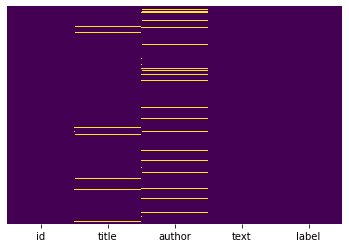

In [48]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
# dropping Nan values
df= df.dropna()
df.shape

(18285, 5)

In [50]:
# Independent features
X=df.drop('label',axis=1)

# Label column
y=df['label']

X.shape

(18285, 4)

In [33]:
messages = X.copy()
messages.reset_index(inplace=True)

# Text Preprocessing

In [34]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [36]:
# Dataset Preprocessing
corpus = []
for i in range (0,len(messages)):
    msg =re.sub('[^a-zA-Z]',' ',messages['title'][i]) # Substitute all numeric values and symbols with space ' '
    msg =msg.lower().split()
    # Eliminating the stop words and stemming others
    msg =[wordnet.lemmatize(word) for word in msg if not word in stopwords.words('English')]
    msg= ' '.join(msg)
    corpus.append(msg)

# One Hot Representation

In [39]:
voc_size = 5000

sent_length = 20

# One hot representation and zero padding
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [40]:
print(corpus[0])
print(onehot_repr[0])
print(embedded_docs[0])

house dem aide even see comey letter jason chaffetz tweeted
[4409, 939, 577, 4568, 2728, 2983, 4692, 4477, 3355, 3695]
[   0    0    0    0    0    0    0    0    0    0 4409  939  577 4568
 2728 2983 4692 4477 3355 3695]


# LSTM Model

In [52]:
import keras
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import Dropout

In [101]:

# Creating model
embedding_vector_features=40

model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True)) 
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Creating train and test sets

In [54]:

import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)


X_final.shape,y_final.shape

((18285, 20), (18285,))

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)


# Model Training

In [102]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,batch_size=64)

C:\Users\mohan\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14628 samples, validate on 3657 samples
Epoch 1/12
14628/14628 [==============================] - 10s 688us/step - loss: 0.3254 - accuracy: 0.8409 - val_loss: 0.2117 - val_accuracy: 0.9087
Epoch 2/12
14628/14628 [==============================] - 9s 630us/step - loss: 0.1561 - accuracy: 0.9383 - val_loss: 0.2180 - val_accuracy: 0.9054
Epoch 3/12
14628/14628 [==============================] - 9s 632us/step - loss: 0.1111 - accuracy: 0.9578 - val_loss: 0.2333 - val_accuracy: 0.9076
Epoch 4/12
14628/14628 [==============================] - 9s 621us/step - loss: 0.0863 - accuracy: 0.9690 - val_loss: 0.2577 - val_accuracy: 0.9051
Epoch 5/12
14628/14628 [==============================] - 9s 625us/step - loss: 0.0680 - accuracy: 0.9770 - val_loss: 0.3087 - val_accuracy: 0.9040
Epoch 6/12
14628/14628 [==============================] - 9s 628us/step - loss: 0.0536 - accuracy: 0.9811 - val_loss: 0.3290 - val_accuracy: 0.9024
Epoch 7/12
14628/14628 [==============================] - 9s 6

# Performance Evaluation

In [103]:
model.save('fake_news.h5')

y_pred=model.predict_classes(X_test)



from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print(cm)
print(acc)

[[1838  244]
 [ 106 1469]]
0.9042931364506426
